In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
from google.colab import files
uploaded = files.upload()

Saving image1.jpg to image1 (1).jpg


In [47]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
from imutils import face_utils

In [48]:
image_path = list(uploaded.keys())[0]  # Get the file name of the uploaded image
image = cv2.imread(image_path)

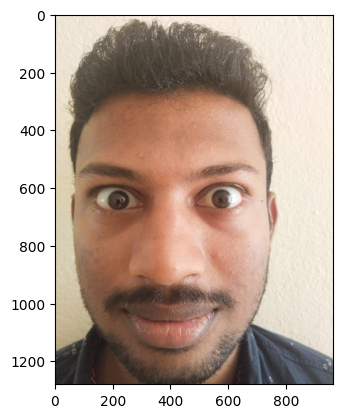

In [49]:
# Convert the image from BGR (OpenCV default) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)

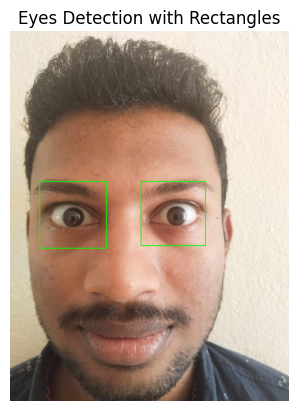

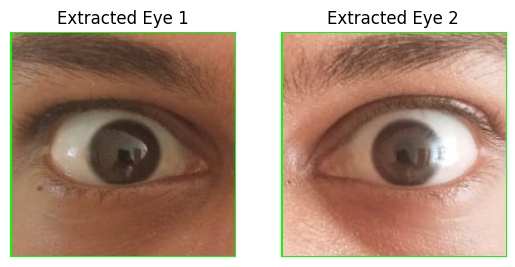

In [50]:
import cv2
import dlib
import matplotlib.pyplot as plt
from imutils import face_utils

# Load the image (replace with the correct path to your image)
#image = cv2.imread('path_to_your_image')  # Replace with your image path

# Check if the image is loaded correctly
if image is None:
    print("Error: Image not found!")
    exit()

# Convert the image to grayscale (Haar cascades work on grayscale images)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load the pre-trained Haar Cascade for eye detection (OpenCV comes with a pre-trained model)
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Load Dlib's face detector and the shape predictor for facial landmarks
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  # Ensure correct model path

# Detect faces in the image
faces = detector(gray)

# Initialize a list to store extracted eyes
extracted_eyes = []

# Iterate over the detected faces
for face in faces:
    # Get the facial landmarks (not used for drawing now)
    landmarks = predictor(gray, face)
    landmarks = face_utils.shape_to_np(landmarks)  # Convert landmarks to a NumPy array

    # Extract the coordinates of the left and right eyes from the landmarks
    left_eye_points = landmarks[36:42]  # Points for the left eye
    right_eye_points = landmarks[42:48]  # Points for the right eye

    # Detect eyes using Haar cascade (this will give bounding boxes around the eyes)
    eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Crop and save extracted eyes based on the bounding boxes
    for i, (x, y, w, h) in enumerate(eyes):
        eye_region = image[y:y+h, x:x+w]
        extracted_eyes.append(eye_region)

        # Draw bounding boxes around the detected eyes (Green color, thickness 2)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw green rectangle

# Convert the image to RGB for displaying with matplotlib (OpenCV uses BGR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image with rectangles around eyes
plt.imshow(image_rgb)
plt.title("Eyes Detection with Rectangles")
plt.axis('off')  # Hide axes
plt.show()

# Optionally, display the extracted eye images
if extracted_eyes:
    for i, eye in enumerate(extracted_eyes):
        plt.subplot(1, len(extracted_eyes), i + 1)
        plt.imshow(cv2.cvtColor(eye, cv2.COLOR_BGR2RGB))
        plt.title(f"Extracted Eye {i+1}")
        plt.axis('off')  # Hide axes
    plt.show()
else:
    print("No eyes detected!")


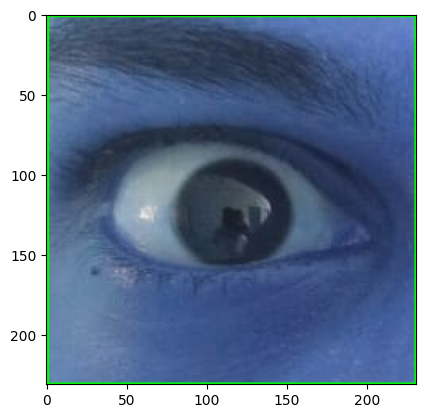

In [51]:
plt.imshow(extracted_eyes[0])

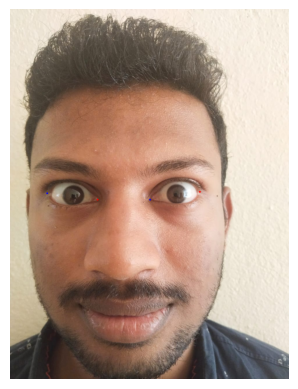

In [121]:
import cv2
import dlib
import matplotlib.pyplot as plt

# Load Dlib's face detector and shape predictor model
predictor_path = "shape_predictor_68_face_landmarks.dat"  # Path to the model file
detector = dlib.get_frontal_face_detector()  # Dlib's face detector
predictor = dlib.shape_predictor(predictor_path)  # Shape predictor for landmarks

# Load the image (replace with your image path)
#image_path = 'path_to_your_face_image.jpg'  # Provide the path to your image
image = cv2.imread(image_path)

# Convert the image to grayscale for face detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image
faces = detector(gray)

# Process each face found in the image
for face in faces:
    # Get the landmarks for the detected face
    landmarks = predictor(gray, face)

    # Extract the canthus points (inner and outer corners) for both eyes
    # Left Eye (canthus points)
    inner_canthus_left = (landmarks.part(36).x, landmarks.part(36).y)  # Left inner corner
    outer_canthus_left = (landmarks.part(39).x, landmarks.part(39).y)  # Left outer corner

    # Right Eye (canthus points)
    inner_canthus_right = (landmarks.part(42).x, landmarks.part(42).y)  # Right inner corner
    outer_canthus_right = (landmarks.part(45).x, landmarks.part(45).y)  # Right outer corner



    # Visualize the landmarks: Draw circles on the canthus landmarks
    cv2.circle(image, inner_canthus_left, 3, (255, 0, 0), -1)  # Green circle for left inner canthus
    cv2.circle(image, outer_canthus_left, 3, (0, 0, 255), -1)  # Red circle for left outer canthus
    cv2.circle(image, inner_canthus_right, 3, (255, 0, 0), -1)  # Green circle for right inner canthus
    cv2.circle(image, outer_canthus_right, 3, (0, 0, 255), -1)  # Red circle for right outer canthus

# Convert the image to RGB for displaying with matplotlib (since OpenCV uses BGR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with the canthus points
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()

In [122]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Left Eye Inner Canthus: (128, 637)
Left Eye Outer Canthus: (302, 659)
Right Eye Inner Canthus: (483, 659)
Right Eye Outer Canthus: (655, 632)


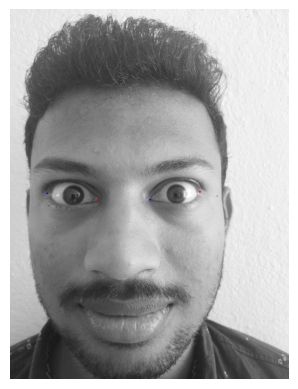

In [123]:
import cv2
import dlib
import matplotlib.pyplot as plt

# Load Dlib's face detector and shape predictor model
predictor_path = "shape_predictor_68_face_landmarks.dat"  # Path to the model file
detector = dlib.get_frontal_face_detector()  # Dlib's face detector
predictor = dlib.shape_predictor(predictor_path)  # Shape predictor for landmarks

# Load the image (replace with your image path)
# image_path = 'path_to_your_face_image.jpg'  # Provide the path to your image
image = cv2.imread(image_path)

# Convert the image to grayscale for face detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image
faces = detector(gray)

# Make a copy of the grayscale image to draw colored circles on it
image_with_landmarks = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

# Process each face found in the image
for face in faces:
    # Get the landmarks for the detected face
    landmarks = predictor(gray, face)

    # Extract the canthus points (inner and outer corners) for both eyes
    # Left Eye (canthus points)
    inner_canthus_left = (landmarks.part(36).x, landmarks.part(36).y)  # Left inner corner
    outer_canthus_left = (landmarks.part(39).x, landmarks.part(39).y)  # Left outer corner

    # Right Eye (canthus points)
    inner_canthus_right = (landmarks.part(42).x, landmarks.part(42).y)  # Right inner corner
    outer_canthus_right = (landmarks.part(45).x, landmarks.part(45).y)  # Right outer corner

    # Print the canthus coordinates
    print(f"Left Eye Inner Canthus: {inner_canthus_left}")
    print(f"Left Eye Outer Canthus: {outer_canthus_left}")
    print(f"Right Eye Inner Canthus: {inner_canthus_right}")
    print(f"Right Eye Outer Canthus: {outer_canthus_right}")

    # Visualize the landmarks: Draw larger and brighter circles on the canthus landmarks
    circle_radius = 3  # Increase the size of the circle (larger radius)
    brightness = 255   # Use maximum brightness for the color (bright green/red)

    # Green circle for left inner canthus
    cv2.circle(image_with_landmarks, inner_canthus_left, circle_radius, (255, 0, 0), -1)

    # Red circle for left outer canthus
    cv2.circle(image_with_landmarks, outer_canthus_left, circle_radius, (0, 0, 255), -1)

    # Green circle for right inner canthus
    cv2.circle(image_with_landmarks, inner_canthus_right, circle_radius, (255, 0, 0), -1)

    # Red circle for right outer canthus
    cv2.circle(image_with_landmarks, outer_canthus_right, circle_radius, (0, 0, 255), -1)

# Convert the image with colored landmarks back to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image_with_landmarks, cv2.COLOR_BGR2RGB)

# Display the grayscale image with colored canthus points
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()


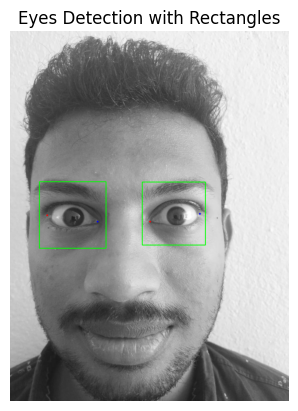

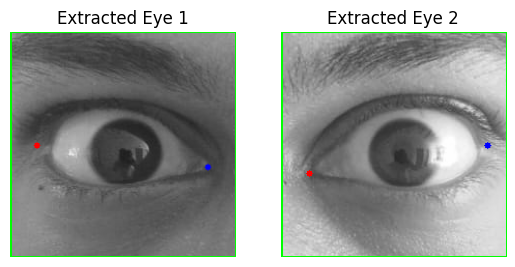

In [124]:
import cv2
import dlib
import matplotlib.pyplot as plt
from imutils import face_utils

# Load the image (replace with the correct path to your image)
#image = cv2.imread('path_to_your_image')  # Replace with your image path
image=image_rgb
# Check if the image is loaded correctly
if image is None:
    print("Error: Image not found!")
    exit()

# Convert the image to grayscale (Haar cascades work on grayscale images)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load the pre-trained Haar Cascade for eye detection (OpenCV comes with a pre-trained model)
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Load Dlib's face detector and the shape predictor for facial landmarks
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  # Ensure correct model path

# Detect faces in the image
faces = detector(gray)

# Initialize a list to store extracted eyes
extracted_eyes = []

# Iterate over the detected faces
for face in faces:
    # Get the facial landmarks (not used for drawing now)
    landmarks = predictor(gray, face)
    landmarks = face_utils.shape_to_np(landmarks)  # Convert landmarks to a NumPy array

    # Extract the coordinates of the left and right eyes from the landmarks
    left_eye_points = landmarks[36:42]  # Points for the left eye
    right_eye_points = landmarks[42:48]  # Points for the right eye

    # Detect eyes using Haar cascade (this will give bounding boxes around the eyes)
    eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Crop and save extracted eyes based on the bounding boxes
    for i, (x, y, w, h) in enumerate(eyes):
        eye_region = image[y:y+h, x:x+w]
        extracted_eyes.append(eye_region)

        # Draw bounding boxes around the detected eyes (Green color, thickness 2)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw green rectangle

# Convert the image to RGB for displaying with matplotlib (OpenCV uses BGR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image with rectangles around eyes
plt.imshow(image_rgb)
plt.title("Eyes Detection with Rectangles")
plt.axis('off')  # Hide axes
plt.show()

# Optionally, display the extracted eye images
if extracted_eyes:
    for i, eye in enumerate(extracted_eyes):
        plt.subplot(1, len(extracted_eyes), i + 1)
        plt.imshow(cv2.cvtColor(eye, cv2.COLOR_BGR2RGB))
        plt.title(f"Extracted Eye {i+1}")
        plt.axis('off')  # Hide axes
    plt.show()
else:
    print("No eyes detected!")


In [125]:
extracted_eyes_dup=extracted_eyes

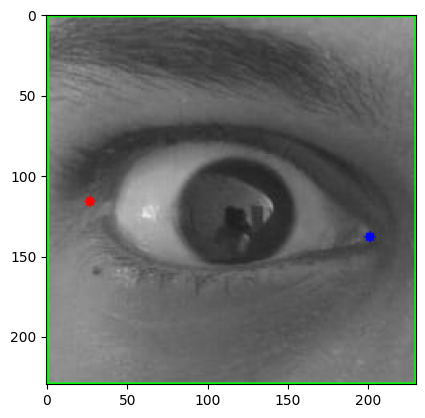

In [126]:
plt.imshow(cv2.cvtColor(extracted_eyes_dup[0],cv2.COLOR_BGR2RGB))

In [127]:
left_eye_canthus=[]
right_eye_canthus=[]

Blue mark coordinates: (201, 138)


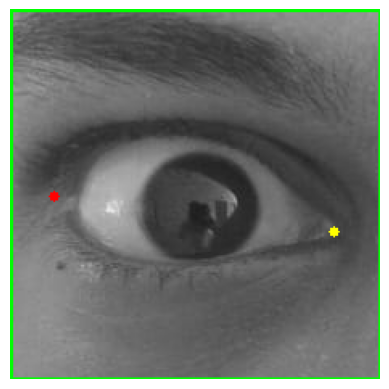

In [128]:
import cv2
import numpy as np

# Load the grayscale image (with the colored marks)
image = extracted_eyes[0]

# Convert to HSV (Hue, Saturation, Value) color space for better color segmentation
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range of blue color in HSV space
# Blue color: Hue value around 120, saturation and value can vary (range from 100-255)
lower_blue = np.array([100, 100, 100])  # Lower bound of blue color
upper_blue = np.array([140, 255, 255])  # Upper bound of blue color

# Create a mask that identifies blue areas in the image
mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Find contours in the mask image
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Check if any blue marks were detected
if contours:
    # Loop through the contours and find the center of the blue mark
    for contour in contours:
        # Calculate the center of the contour using moments
        M = cv2.moments(contour)
        if M["m00"] != 0:  # Check to avoid division by zero
            # Calculate the centroid (cx, cy)
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            print(f"Blue mark coordinates: ({cx}, {cy})")
            left_eye_canthus.append((cx,cy))


            # Optionally, draw the center on the image
            cv2.circle(image, (cx, cy), 3, (0, 255, 255), -1)  # Draw yellow circle at center

    # Convert the image back to RGB (to display with Matplotlib or cv2.imshow)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with the detected blue mark center
    import matplotlib.pyplot as plt
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

else:
    print("No blue marks detected.")

Red mark coordinates: (27, 116)


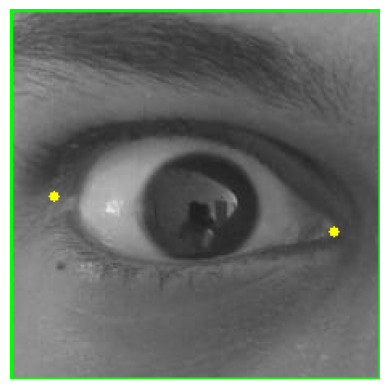

In [129]:
# Load the grayscale image (with the colored marks)
image = extracted_eyes[0]  # Replace with your actual image variable

# Convert the image to HSV (Hue, Saturation, Value) color space for better color segmentation
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range of red color in HSV space (Red can be in two regions)
# Lower Red (Hue value around 0-10)
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])

# Upper Red (Hue value around 170-180)
lower_red2 = np.array([170, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Create masks for the two red ranges
mask_red1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv_image, lower_red2, upper_red2)

# Combine the two masks to get the final red mask
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

# Find contours in the red mask image
contours, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Check if any red marks were detected
if contours:
    # Loop through the contours and find the center of the red mark
    for contour in contours:
        # Calculate the center of the contour using moments
        M = cv2.moments(contour)
        if M["m00"] != 0:  # Check to avoid division by zero
            # Calculate the centroid (cx, cy)
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            print(f"Red mark coordinates: ({cx}, {cy})")
            left_eye_canthus.append((cx,cy))


            # Optionally, draw the center on the image (yellow circle)
            cv2.circle(image, (cx, cy), 3, (0, 255, 255), -1)  # Draw yellow circle at center

    # Convert the image back to RGB (to display with Matplotlib or cv2.imshow)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with the detected red mark center
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

else:
    print("No red marks detected.")


In [130]:
left_eye_canthus

[(201, 138), (27, 116)]

Blue mark coordinates: (199, 110)


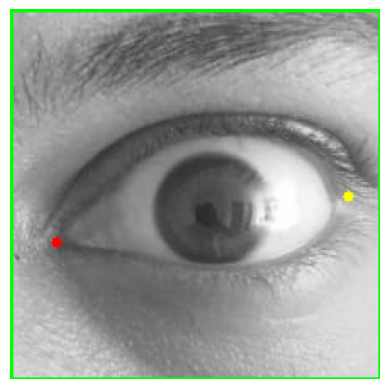

In [131]:
# Load the grayscale image (with the colored marks)
image = extracted_eyes[1]

# Convert to HSV (Hue, Saturation, Value) color space for better color segmentation
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range of blue color in HSV space
# Blue color: Hue value around 120, saturation and value can vary (range from 100-255)
lower_blue = np.array([100, 100, 100])  # Lower bound of blue color
upper_blue = np.array([140, 255, 255])  # Upper bound of blue color

# Create a mask that identifies blue areas in the image
mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Find contours in the mask image
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Check if any blue marks were detected
if contours:
    # Loop through the contours and find the center of the blue mark
    for contour in contours:
        # Calculate the center of the contour using moments
        M = cv2.moments(contour)
        if M["m00"] != 0:  # Check to avoid division by zero
            # Calculate the centroid (cx, cy)
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            print(f"Blue mark coordinates: ({cx}, {cy})")
            right_eye_canthus.append((cx,cy))


            # Optionally, draw the center on the image
            cv2.circle(image, (cx, cy), 3, (0, 255, 255), -1)  # Draw yellow circle at center

    # Convert the image back to RGB (to display with Matplotlib or cv2.imshow)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with the detected blue mark center
    import matplotlib.pyplot as plt
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

else:
    print("No blue marks detected.")

Red mark coordinates: (27, 137)


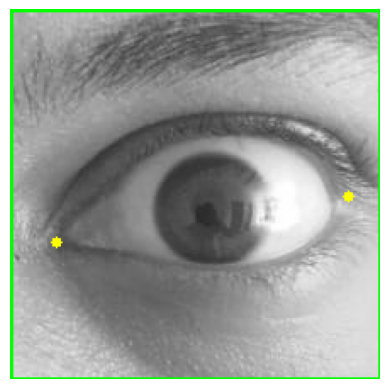

In [132]:
# Load the grayscale image (with the colored marks)
image = extracted_eyes[1]  # Replace with your actual image variable

# Convert the image to HSV (Hue, Saturation, Value) color space for better color segmentation
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range of red color in HSV space (Red can be in two regions)
# Lower Red (Hue value around 0-10)
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])

# Upper Red (Hue value around 170-180)
lower_red2 = np.array([170, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Create masks for the two red ranges
mask_red1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv_image, lower_red2, upper_red2)

# Combine the two masks to get the final red mask
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

# Find contours in the red mask image
contours, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Check if any red marks were detected
if contours:
    # Loop through the contours and find the center of the red mark
    for contour in contours:
        # Calculate the center of the contour using moments
        M = cv2.moments(contour)
        if M["m00"] != 0:  # Check to avoid division by zero
            # Calculate the centroid (cx, cy)
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            print(f"Red mark coordinates: ({cx}, {cy})")
            right_eye_canthus.append((cx,cy))


            # Optionally, draw the center on the image (yellow circle)
            cv2.circle(image, (cx, cy), 3, (0, 255, 255), -1)  # Draw yellow circle at center

    # Convert the image back to RGB (to display with Matplotlib or cv2.imshow)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with the detected red mark center
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

else:
    print("No red marks detected.")


In [133]:
left_eye_canthus # [inner , outer]


[(201, 138), (27, 116)]

In [134]:
right_eye_canthus #[outer , innner]

[(199, 110), (27, 137)]

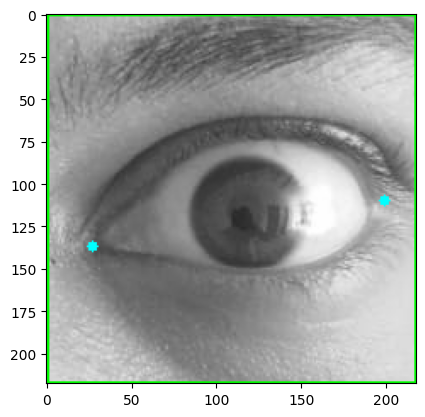

In [135]:
plt.imshow(extracted_eyes[1])

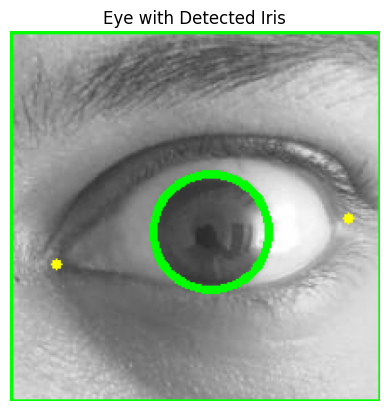

Iris Center: (118, 118)
Iris Radius: 34


In [136]:
# Function to detect iris in the eye image
def detect_iris(eye_image):
    # Check if the image is loaded properly
    if eye_image is None:
        raise ValueError("The eye image is not loaded properly. Please check the image path or extraction.")

    # Convert to grayscale
    gray = cv2.cvtColor(eye_image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve circle detection
    blurred = cv2.GaussianBlur(gray, (9, 9), 2)

    # Detect circles using Hough Circle Transform (to find the iris)
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=30,
                               param1=50, param2=30, minRadius=20, maxRadius=50)

    iris_center = None
    iris_radius = None

    # Check if circles are found
    if circles is not None:
        # Convert to integer values (since HoughCircles returns float)
        circles = np.uint16(np.around(circles))

        # The first circle detected is likely the iris (larger circular region)
        iris_center = (circles[0][0][0], circles[0][0][1])
        iris_radius = circles[0][0][2]

        # Draw the detected circle (the iris) on the image
        cv2.circle(eye_image, iris_center, iris_radius, (0, 255, 0), 3)  # Green circle for the iris center

    return eye_image, iris_center, iris_radius

# Load the eye image (replace 'eye_image.jpg' with your actual image path)
eye_image = extracted_eyes[1]
  # Replace with your actual image path

# Check if image is loaded properly
if eye_image is None:
    print("Error: Unable to load the image. Check the file path.")
else:
    # Process the eye image to detect the iris
    annotated_eye, iris_center, iris_radius = detect_iris(eye_image)

    # Display the annotated eye image
    plt.imshow(cv2.cvtColor(annotated_eye, cv2.COLOR_BGR2RGB))
    plt.title('Eye with Detected Iris')
    plt.axis('off')
    plt.show()

    # Print the coordinates and radius of the detected iris
    if iris_center is not None:
        print(f"Iris Center: {iris_center}")
        right_eye_pupil=[iris_center]

        print(f"Iris Radius: {iris_radius}")
    else:
        print("No iris detected.")



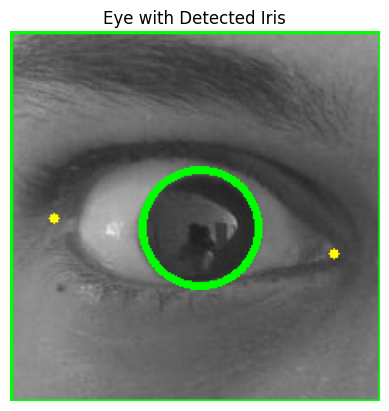

Iris Center: (118, 122)
Iris Radius: 36


In [137]:
# Function to detect iris in the eye image
def detect_iris(eye_image):
    # Check if the image is loaded properly
    if eye_image is None:
        raise ValueError("The eye image is not loaded properly. Please check the image path or extraction.")

    # Convert to grayscale
    gray = cv2.cvtColor(eye_image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve circle detection
    blurred = cv2.GaussianBlur(gray, (9, 9), 2)

    # Detect circles using Hough Circle Transform (to find the iris)
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=30,
                               param1=50, param2=30, minRadius=20, maxRadius=50)

    iris_center = None
    iris_radius = None

    # Check if circles are found
    if circles is not None:
        # Convert to integer values (since HoughCircles returns float)
        circles = np.uint16(np.around(circles))

        # The first circle detected is likely the iris (larger circular region)
        iris_center = (circles[0][0][0], circles[0][0][1])
        iris_radius = circles[0][0][2]

        # Draw the detected circle (the iris) on the image
        cv2.circle(eye_image, iris_center, iris_radius, (0, 255, 0), 3)  # Green circle for the iris center

    return eye_image, iris_center, iris_radius

# Load the eye image (replace 'eye_image.jpg' with your actual image path)
eye_image = extracted_eyes[0]
  # Replace with your actual image path

# Check if image is loaded properly
if eye_image is None:
    print("Error: Unable to load the image. Check the file path.")
else:
    # Process the eye image to detect the iris
    annotated_eye, iris_center, iris_radius = detect_iris(eye_image)

    # Display the annotated eye image
    plt.imshow(cv2.cvtColor(annotated_eye, cv2.COLOR_BGR2RGB))
    plt.title('Eye with Detected Iris')
    plt.axis('off')
    plt.show()

    # Print the coordinates and radius of the detected iris
    if iris_center is not None:
        print(f"Iris Center: {iris_center}")
        left_eye_pupil=[iris_center]
        print(f"Iris Radius: {iris_radius}")
    else:
        print("No iris detected.")



In [139]:
# it is extracted i copy pasted from previous one (remove this in next run)
left_pupil = [118, 122]
right_pupil= [118, 118]


In [140]:
left_eye_canthus #[inner,outer]

[(201, 138), (27, 116)]

In [141]:
right_eye_canthus #[outer,inner]

[(199, 110), (27, 137)]

In [144]:
import math
def distance(a,b):
  y=((b[0]-a[0])**2)+((b[1]-a[1])**2)
  return math.sqrt(y)


In [150]:
L1=distance(left_eye_canthus[1],left_pupil) # left external - pupil
L2=distance(left_eye_canthus[0],left_pupil) # left internal - pupil
R1=distance(right_eye_canthus[0],right_pupil) # right external - pupil
R2=distance(right_eye_canthus[1],right_pupil) # right internal - pupil


In [151]:
L1

91.19758768739445

In [152]:
L2

84.52810183601665

In [153]:
R1

81.39410298049853

In [154]:
R2

92.9623579735368

In [161]:
leftratio=L1/L2
rightratio=R1/R2

In [162]:
S=(max(leftratio,rightratio))/(min(leftratio,rightratio))
S

1.232243181939857

In [163]:

# Calculate average distances
left_avg = (L1 + L2) / 2
right_avg = (R1 + R2) / 2

# Calculate symmetry difference
symmetry_difference = abs(left_avg - right_avg)
print(f"Symmetry Difference: {symmetry_difference}")

# Normalize symmetry difference (if needed)
max_possible_difference = max(left_avg, right_avg)
normalized_symmetry = symmetry_difference / max_possible_difference if max_possible_difference != 0 else 0

print(f"Normalized Symmetry Difference: {normalized_symmetry}")


Symmetry Difference: 0.684614284687882
Normalized Symmetry Difference: 0.0077918520228275915


In [164]:
"""
l1= distance between left external canthi to pupil center
l2= distance between left internal canthi to pupil center
r1= distance between right external canthi to pupil center
r2= distance between right internal  canthi to pupil center

If the symmetry difference or normalized symmetry is very small (close to 0), the eyes are very symmetrical.
If the symmetry difference or normalized symmetry is large (closer to 1), it indicates that the eyes are less symmetrical."""

'\nl1= distance between left external canthi to pupil center \nl2= distance between left internal canthi to pupil center \nr1= distance between right external canthi to pupil center \nr2= distance between right internal  canthi to pupil center \n\nIf the symmetry difference or normalized symmetry is very small (close to 0), the eyes are very symmetrical.\nIf the symmetry difference or normalized symmetry is large (closer to 1), it indicates that the eyes are less symmetrical.'